# Выбор локации для скважины

Задача

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Загрузим все необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

<b>Изучим датасеты </b>

In [ ]:
data_list=[data_0, data_1, data_2]

for data in data_list:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [ ]:
for data in data_list:
    display(data.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
for data in data_list:
    display(data.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Проверим мультиколлинеарность признаков

In [ ]:
corr = data_0.corr()
corr.style.background_gradient(cmap='YlOrRd')

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [ ]:
corr = data_1.corr()
corr.style.background_gradient(cmap='YlOrRd')

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [ ]:
corr = data_2.corr()
corr.style.background_gradient(cmap='YlOrRd')

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


 Проверим на дубликаты

In [ ]:
data_0.duplicated().sum(), data_1.duplicated().sum(), data_2.duplicated().sum()

(0, 0, 0)

Проверка на уникальность по id

In [ ]:
data_0[data_0.duplicated(subset = ['id'], keep = False)].sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [ ]:
data_1[data_1.duplicated(subset = ['id'], keep = False)].sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [ ]:
data_2[data_2.duplicated(subset = ['id'], keep = False)].sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


При исследовании уникальность id, я обнаружила, что есть повторяющиеся значения. Возможно пробу могли брать 2 раза из скважины, или нет? Уточнить с заказчиком.

<b>Построим гистограммы и определим количество выбросов</b>

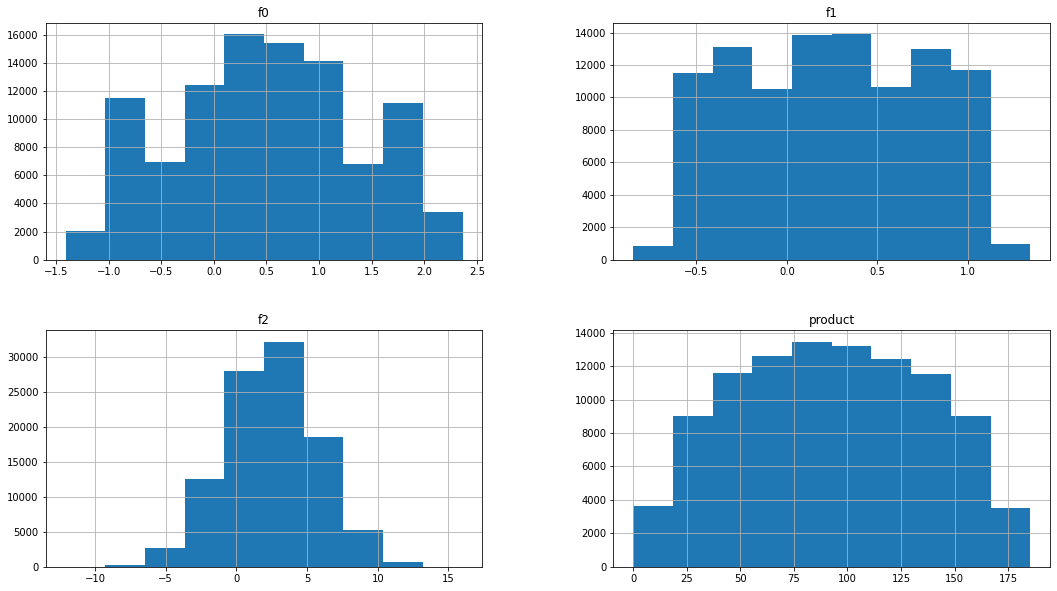

In [ ]:
data_0.hist(figsize=(18, 10))
plt.show()

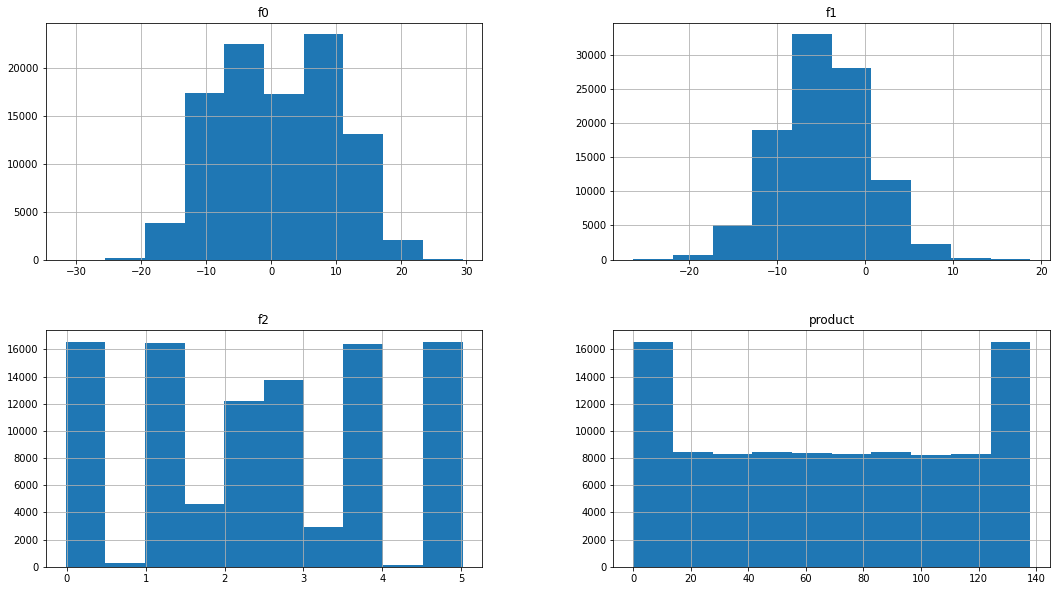

In [ ]:
data_1.hist(figsize=(18, 10))
plt.show()

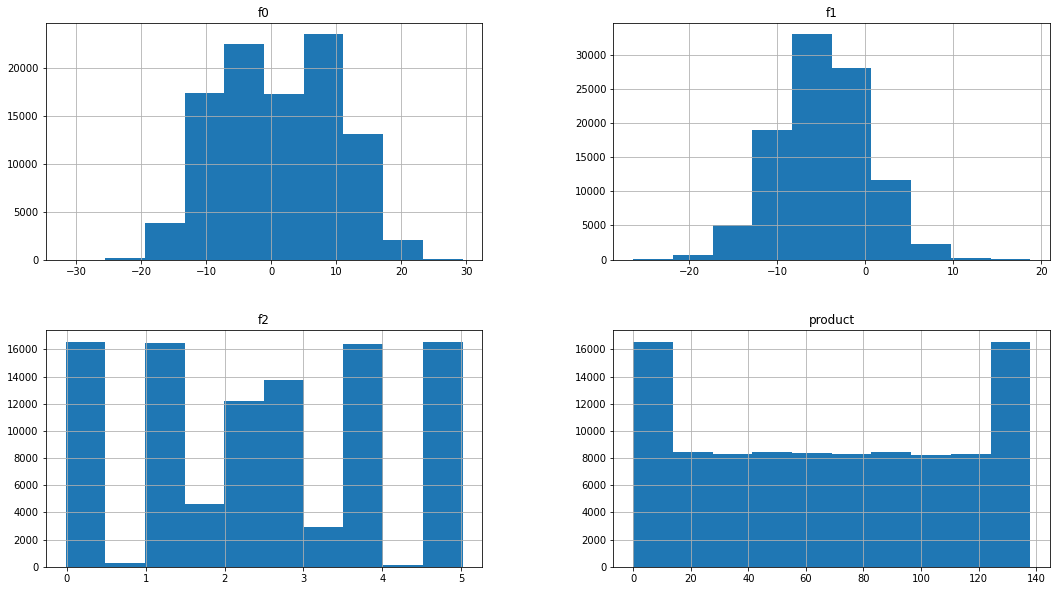

In [ ]:
data_1.hist(figsize=(18, 10))
plt.show()

### Выводы:
- В данных отсутсвуют пропуски
- Нет дубликатов
- Отсутсвуют выбросы
- Единственная мультиколлинеарность - между признаками product и f2, она в разной степени, наблюдается по всем регионам.

## Обучение и проверка модели

In [ ]:
RANDOM_STATE = 12345

Напишем цикл для линейной регрессии:

In [ ]:
def model_lr(data):
    # зададим целевой признак и подготовим данные
    target = data['product']
    features = data.drop(['product', 'id'], axis=1)

    # Разбьём данные на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)

    scaler = MinMaxScaler() #сделаем скейлинг
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)

    model = LinearRegression() # обучим модель
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)

    rmse = mean_squared_error(target_valid, predicted_valid)**0.5  # посчитаем rmse

    predicted_valid_mean = predicted_valid.sum()/len(predicted_valid) # посчитаем средний запас сырья

    return target_valid, predicted_valid, rmse, predicted_valid_mean

Получим показатели для каждого региона

In [ ]:
target_valid_0, predicted_valid_0, rmse_0, predicted_valid_mean_0 = model_lr(data_0)
target_valid_1, predicted_valid_1, rmse_1, predicted_valid_mean_1 = model_lr(data_1)
target_valid_2, predicted_valid_2, rmse_2, predicted_valid_mean_2 = model_lr(data_2)

In [ ]:
print('Регион_0: Средний запас сырья:', round(predicted_valid_mean_0, 2), 'тыс. баррелей,', 'rmse:', rmse_0)
print('Регион_1: Средний запас сырья:', round(predicted_valid_mean_1, 2), 'тыс. баррелей,','rmse:', rmse_1)
print('Регион_2: Средний запас сырья:', round(predicted_valid_mean_2, 2), 'тыс. баррелей,','rmse:', rmse_2)

Регион_0: Средний запас сырья: 92.59 тыс. баррелей, rmse: 37.5794217150813
Регион_1: Средний запас сырья: 68.73 тыс. баррелей, rmse: 0.893099286775617
Регион_2: Средний запас сырья: 94.97 тыс. баррелей, rmse: 40.02970873393434


### Выводы:
- В моем проекте линейная регрессия была обучена на тестовой выборке, которая составляет 25% от датасета.
- Проведен скейлинг, посчитан средний запас сырья и качество предсказания метрикой RMSE, которая определяет величину среднеквадратичной ошибки.
- Исходя из полученных данных, можно заметить, что наименьшая величина RMSE - в первом регионе, там же наблюдаются наименьшие средние запас сырья.

## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраним в отдельных переменных.

In [ ]:
point_best = 200
total_points = 500
income_per_barrel_rub = 450
profit = 450000
budget = 10000000000

In [ ]:
budget_per_well = budget / total_points #бюджет на разработку одной скважины
needed_quontity_barrels = (budget/point_best)/income_per_barrel_rub/1000 #объем сырья для безубытка
print('Достаточный объём сырья для безубыточной разработки новой скважины:', needed_quontity_barrels, 'тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111 тыс. баррелей


In [ ]:
table_vol_dict = {'predicted_valid_mean': [predicted_valid_mean_0, predicted_valid_mean_1, predicted_valid_mean_2],
            'needed_quontity_barrels': [needed_quontity_barrels, needed_quontity_barrels, needed_quontity_barrels]}
table_vol = pd.DataFrame(table_vol_dict)

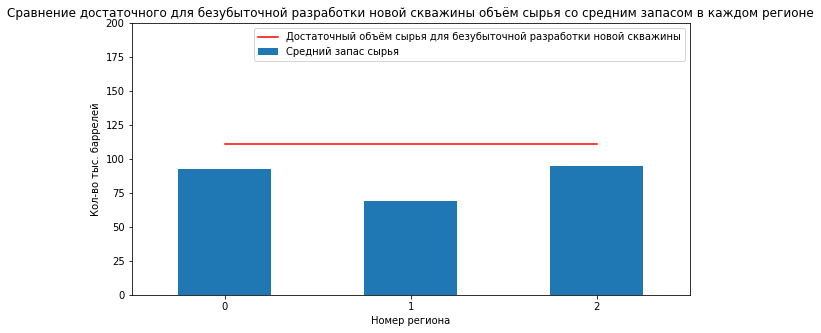

In [ ]:
table_vol['predicted_valid_mean'].plot.bar(ylim=(0, 200),figsize=(10,5), xlabel='Номер региона', ylabel='Кол-во тыс. баррелей')
table_vol['needed_quontity_barrels'].plot.line(ylim=(0,200),figsize=(10,5), color='red')
plt.legend(['Достаточный объём сырья для безубыточной разработки новой скважины', 'Средний запас сырья'])
plt.title('Сравнение достаточного для безубыточной разработки новой скважины объём сырья со средним запасом в каждом регионе')
plt.show()

### Выводы:
- все необходимые данные были сохранены в переменных;
- был рассчитан достаточный объём сырья для безубыточной разработки новой скважины - 111 тыс. баррелей
- при сравнии среднего запаса сырья по регионам с достаточным объемом для безубыточной разработки новой скважины - было обнаружено, что ни в одном регионе средний запас сырья не достугает нужной отметки, наглядно это видно на графике.

## Расчёт прибыли и рисков

Приведем данные к типу Series

In [ ]:
def series_type(target, pred):
    target = target.reset_index(drop=True)
    pred = pd.Series(pred)
    return target, pred

Приведем целевые и прогнозные значения по всем регионам к одному типу

In [ ]:
target_valid_0, predicted_valid_0 = series_type(target_valid_0, predicted_valid_0)
target_valid_1, predicted_valid_1 = series_type(target_valid_1, predicted_valid_1)
target_valid_2, predicted_valid_2 = series_type(target_valid_2, predicted_valid_2)

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [ ]:
def revenue(target_valid, predicted_valid, point_best):
    target = pd.Series(target_valid, index=target_valid.index)
    probabilities = pd.Series(predicted_valid,index=target.index)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:point_best]
    return (profit * selected.sum())-budget

Применим бутстреп

In [ ]:
def bootstrap_region(target_valid, predicted_valid):
    state = RANDOM_STATE
    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(n = total_points, replace=True)
        pred_subsample = predicted_valid[target_subsample.index]

        values.append(revenue(target_subsample, pred_subsample, point_best))
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = np.round(len(values[values < 0]) / len(values)*100)
    return values_mean, lower, upper, risk

Посчитаем основные параметры для трёх регионов

In [ ]:
values_mean_0, lower_0, upper_0, risk_0  = bootstrap_region(target_valid_0, predicted_valid_0)
values_mean_1, lower_1, upper_1, risk_1  = bootstrap_region(target_valid_1, predicted_valid_1)
values_mean_2, lower_2, upper_2, risk_2  = bootstrap_region(target_valid_2, predicted_valid_2)

In [ ]:
print('Средняя прибыль лучших месторождений региона_0 равна', values_mean_0, 'доверительные интервалы: 25%:', lower_0, '95%:', upper_0, )
print('Средняя прибыль лучших месторождений региона_1 равна', values_mean_1, 'доверительные интервалы: 25%:', lower_1, '95%:', upper_1)
print('Средняя прибыль лучших месторождений региона_2 равна', values_mean_2, 'доверительные интервалы: 25%:', lower_2, '95%:', upper_2)

Средняя прибыль лучших месторождений региона_0 равна 424968569 доверительные интервалы: 25%: -135307455 95%: 959116739
Средняя прибыль лучших месторождений региона_1 равна 507991234 доверительные интервалы: 25%: 111683815 95%: 923632662
Средняя прибыль лучших месторождений региона_2 равна 421312456 доверительные интервалы: 25%: -120352116 95%: 968575902


In [ ]:
print('Риск убытков региона_0 равен', risk_0, '%')
print('Риск убытков региона_1 равен', risk_1, '%')
print('Риск убытков региона_2 равен', risk_2, '%')

Риск убытков региона_0 равен 7.0 %
Риск убытков региона_1 равен 0.0 %
Риск убытков региона_2 равен 6.0 %


### Выводы:
- была применена технику Bootstrap с 1000 выборок,
- найдена средняя прибыль, доверительные интервалы и риск убытков.
- регион с наименьшим риском - первый, риск составляет 0%
- по средний прибыли лучших месторождений так же лидирует регион номер 1
- по первому региону мы видим наименьший размер доверительного интервала

## Общий вывод:
- мне были предоставлены пробы нефти в трёх регионах.
- я исследовала 500 точек в каждом регионе, из которых с помощью машинного обучения выбрала 200 лучших для разработки.
- я использовала линейную регрессию при обучении модели для определения региона, где добыча принесёт наибольшую прибыль.
- для определения возможной прибыли и рисков от разработки новой скажины была использована техника Bootstrap.
- по результатам проведенного мной исследования, регион номер один имеет наименьшие риски - 0% и наименьший доверительный интервал, так же у этого региона наибольшие показатели прибыли лучших 200 месторожденияй. Еще одним фактором в пользу первого региона является лучший показатель RMSE линейной регресии -  0.89.
- я рекомендую к разработке новых скважин регион номер один - вероятность убытков по нему соотвествует поставленной задаче - меньше 2,5 %, однако, следует обратить внимание, на недодстаточность показателя среднего запаса сырья на скважине для безубыточной разработки.